<a href="https://colab.research.google.com/github/ReddySameer/tensorflow/blob/main/08_intro_NLP_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP  Fundamentals

* NLP derive information out of natural language
* Sequence of texts




In [1]:
!nvidia-smi -L

/bin/bash: line 1: nvidia-smi: command not found


In [5]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-06-05 16:42:05--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2024-06-05 16:42:05 (17.0 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [6]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

# Get Text Data set

* Kaggles Introduction to NLP dataset

In [2]:
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

--2024-06-05 16:41:56--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.250.141.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.01s   

2024-06-05 16:41:56 (56.7 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [7]:
unzip_data("nlp_getting_started.zip")

In [8]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [9]:
train_df.shape

(7613, 5)

In [10]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [11]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [12]:
train_df.target.value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [13]:
import random
random_index = random.randint(0, len(train_df) -5) #  dont go beyond the end of data
for row in train_df_shuffled[["text", "target"]] [random_index:random_index+5].itertuples(): # Get 5 samples, use itertuples to return tuples of text and targets
  _, text, target = row
  print(f"Target: {target}", "real disaster" if target > 0 else "(not real disaster)")
  print(f"Text: \n{text}\n")

Target: 0 (not real disaster)
Text: 
I'm about to cook your Smokey the Bear saving forest fires face ass  https://t.co/WtGGqS5gEh

Target: 1 real disaster
Text: 
Û÷Hijacker copsÛª back in the dock - http://t.co/9I5cczD5S0 http://t.co/WEaTrRihE1

Target: 0 (not real disaster)
Text: 
#poster #ergo Rotator #cuff injury recovery kit: http://t.co/zj3ODGQHyp Super High Converting Rotator Cuff Inj http://t.co/VZhTiBe4jh

Target: 0 (not real disaster)
Text: 
If you dotish to blight your car go right ahead. Once it's not mine.

Target: 1 real disaster
Text: 
the pastor was not in the scene of the accident......who was the owner of the range rover ?



# Split data into training and validation sets


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                              train_df_shuffled["target"].to_numpy(),
                                                              test_size=0.1,
                                                              random_state=42)

In [16]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [17]:
train_sentences.shape

(6851,)

In [18]:
# Check the first 10 samples
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

# Tokenization Vs Embedding

* Convert text to numbers
* Tokenization
* Embedding - create a matrix of feature vector for each token

# Text Vectorization

In [19]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [20]:
text_vectorizer = TextVectorization(max_tokens=None,  # how many words in the sentence
                                       standardize='lower_and_strip_punctuation',
                                       split="whitespace",
                                       ngrams=None, # create group of n-words
                                       output_mode="int", # data type to map tokens to numbers
                                       output_sequence_length=None, # how long the sequence is
                                       )


In [21]:
# Find the average number of tokens (Words) in the training tweets

round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [22]:
# set vectorizatoin variables

max_vocab_length = 10000
max_length = 15 # max length of words the sequence that can be tokenized

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode = "int",
                                    output_sequence_length=max_length
                                    )


In [23]:
text_vectorizer.adapt(train_sentences)

In [24]:
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [25]:
random_sentence = random.choice(train_sentences)
print(f"original text:\n{random_sentence}  \
\nVectorized version:\n")
text_vectorizer([random_sentence])

original text:
Steve Buscemi was a firefightr B4 fame &amp; workd 12hr shifts diggin thru WTC rubble lookg 4 survivors. http://t.co/L9fJpNSZuO  
Vectorized version:



<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[1757,    1,   23,    3,    1, 2552,    1,   35, 6694,    1, 8565,
           1, 3331, 6643,  643]])>

In [26]:
# Get the unique words in the Vocabulary
words_in_vocab = text_vectorizer.get_vocabulary() # get all teh unique words in the
top_5_words = words_in_vocab[:5]
bottom_t_words = words_in_vocab[-5:]
len(words_in_vocab), top_5_words, bottom_t_words

(10000,
 ['', '[UNK]', 'the', 'a', 'in'],
 ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1'])

# Embedding - rich numerical representation of words which are learnt during training

Tensorflow Embedding layer

* `input_dim` - size of the vocabulary
* `output_dim` - the size of the output emedding layer -- the size of the token
* `input_length` = lenght of the sequence passed to the embedding layer


In [27]:
from tensorflow.keras import layers
embedding = layers.Embedding(input_dim=max_vocab_length, # input shape
                            output_dim=128, # output shape
                             embeddings_initializer="uniform",
                            input_length= max_length # how long is each input
                             )
embedding

In [28]:
random_sentence = random.choice(train_sentences)
print(f"Original text: \n {random_sentence} \
\n\n Embedded Version: ")

# Embed the random sentence -> turn positive integers  into dense vecotrs of fixed size
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text: 
 Check out this item I just got! [Phantasmal Cummerbund] http://t.co/qrHJEI7gRq #Warcraft 

 Embedded Version: 


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.00986279,  0.01681509,  0.02308616, ..., -0.03036377,
          0.02554918,  0.02986019],
        [ 0.00347663,  0.00097733,  0.03592109, ..., -0.01600363,
          0.04227902, -0.04221176],
        [-0.02690781, -0.03542522,  0.03689808, ..., -0.02006187,
         -0.03037187, -0.00515691],
        ...,
        [ 0.04971508,  0.01634205,  0.00557987, ..., -0.0149362 ,
         -0.04931817,  0.01807486],
        [ 0.04971508,  0.01634205,  0.00557987, ..., -0.0149362 ,
         -0.04931817,  0.01807486],
        [ 0.04971508,  0.01634205,  0.00557987, ..., -0.0149362 ,
         -0.04931817,  0.01807486]]], dtype=float32)>

# Check out the single token embedding

In [25]:
sample_embed[0][0], sample_embed[0][0].shape, random_sentence[0]

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-0.02799129,  0.00020661, -0.00575133,  0.01459906, -0.04942504,
         0.03832516, -0.02140143, -0.00622754, -0.02304491,  0.00339983,
        -0.0444129 , -0.033016  , -0.03801719, -0.02224253, -0.00661564,
        -0.04159098, -0.03749378,  0.03520599,  0.04580745,  0.00464722,
        -0.02989863, -0.03118246,  0.0234087 , -0.02786938,  0.04987134,
         0.00700311, -0.04153939, -0.0242061 , -0.02443061, -0.00688409,
         0.00597243, -0.03775488, -0.03536994, -0.01122298, -0.03507306,
        -0.00893713,  0.04271065,  0.01523943,  0.0208815 ,  0.0319456 ,
         0.02612132,  0.0380423 ,  0.03034521, -0.03291479,  0.02670509,
         0.02116463,  0.01754198,  0.02367994, -0.03688885,  0.019874  ,
         0.0129879 , -0.04395667, -0.04033754,  0.04653236,  0.0083156 ,
        -0.03735584, -0.04104711, -0.01955273, -0.03227106, -0.00197192,
         0.02782876, -0.04645677,  0.03516335, -0.00041736, -0.00536274,
  

# Text Sequence to numbers

TF-IDF = Term Frequency - Inverse Document Frequency->  It can be defined as the calculation of how relevant a word in a series or corpus is to a text. -> frequency of words to determine how relevant those words
* Model0 Naive Bayes (baseline) sklearn ML Map https://scikit-learn.org/stable/tutorial/machine_learning_map/
* Model 1: Feed-Forward neural network (Dense Model)
* Model 2: LSTM Model (RNN)
* Model 3: GRU Model (RNN)
* Model 4: Bidirectional-LSTM Model (RNN)
* Model 5: ID Convolutional Neural Network (CNN)
* Model 6: Tensorflow Hub PRetrained Feature Extractor (using transfer learning NLP)
* Model 7: Similar to Model6 with 10% model data

In [ ]:
#Model 0: Creating a Baseline Model
# sklearn's Multinomial Naive Bayes using the TF-IDF formaula to convert words to numbers


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()), # Convert words to numbers using tfidf
    ("clf", MultinomialNB()) # clf - classifier - model to text
])
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [30]:
baseline_score = model_0.score(val_sentences, val_labels)
print(f" the baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

 the baseline model achieves an accuracy of: 79.27%


In [31]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

# Create a function to evaluate the predictions

* Accuracy
* Precision
* Recall
* F1 Score



In [32]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results (y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score for the binary classification model
  """

  #Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100

  #  calculate model precision, recall and f1-score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred)

  model_results = {"accuracy": model_accuracy,
                   "precision": model_precision[0],
                   "recall": model_recall[0],
                   "f1": model_f1[0]
                   }

  return model_results

In [33]:
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.748062015503876,
 'recall': 0.9323671497584541,
 'f1': 0.8301075268817204}

# A Simple Dense Model

* Create a tensor board callback.


In [34]:
from helper_functions import create_tensorboard_callback

# create directory to save tensorboard logs
SAVE_DIR = "model_logs"

In [35]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x= text_vectorizer(inputs)
x = embedding(x)
#x = layers.GlobalAveragePooling1D()(x) # GlobalAveragePooling1D is for one dimensional data
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x) # need binary outputs, use sigmoid
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

In [40]:
inputs.shape, outputs.shape

(TensorShape([None, 1]), TensorShape([None, 1]))

In [57]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [34]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 dense (Dense)               (None, 15, 1)             129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 1280129 (4.88 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [139]:
model_1.compile(loss= "binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [140]:
train_sentences.shape, train_labels.shape, val_labels.shape, val_sentences.shape

((6851,), (6851,), (762,), (762,))

In [141]:
train_labels.shape
train_labels_exp = tf.expand_dims(train_labels, axis=-1)
train_labels.shape, train_labels_exp.shape, train_sentences.shape, SAVE_DIR

((6851,), TensorShape([6851, 1]), (6851,), 'model_logs')

In [142]:
val_labels.shape

(762,)

In [143]:
model_1_history = model_1.fit(train_sentences, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="simple_dense_model")])


Saving TensorBoard log files to: model_logs/simple_dense_model/20240605-172957
Epoch 1/5
215/215 [==============================] - 4s 16ms/step - loss: 0.5753 - accuracy: 0.7813 - val_loss: 0.5256 - val_accuracy: 0.7808
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.3522 - accuracy: 0.9132 - val_loss: 0.4645 - val_accuracy: 0.7874
Epoch 3/5
215/215 [==============================] - 4s 21ms/step - loss: 0.2332 - accuracy: 0.9350 - val_loss: 0.4685 - val_accuracy: 0.7979
Epoch 4/5
215/215 [==============================] - 3s 16ms/step - loss: 0.1678 - accuracy: 0.9540 - val_loss: 0.4876 - val_accuracy: 0.7874
Epoch 5/5
215/215 [==============================] - 5s 23ms/step - loss: 0.1277 - accuracy: 0.9635 - val_loss: 0.5155 - val_accuracy: 0.7927


In [144]:
# with GlobalMaxpool1d
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 2ms/step - loss: 0.5155 - accuracy: 0.7927


[0.515514612197876, 0.7926509380340576]

In [145]:
# with GlobalAveragePooling1D
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 2ms/step - loss: 0.5155 - accuracy: 0.7927


[0.515514612197876, 0.7926509380340576]

In [146]:
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape

24/24 [==============================] - 0s 2ms/step


(762, 1)

In [147]:
model_1_pred_probs[0]

array([0.53021616], dtype=float32)

In [148]:
# Convert model Prediciton probabilities to label format
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [149]:
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 79.26509186351706,
 'precision': 0.7735042735042735,
 'recall': 0.8743961352657005,
 'f1': 0.8208616780045351}

In [150]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.748062015503876,
 'recall': 0.9323671497584541,
 'f1': 0.8301075268817204}

In [151]:
model_1_results_values = [str(value) for value in model_1_results.values()]
model_1_results_values

['79.26509186351706',
 '0.7735042735042735',
 '0.8743961352657005',
 '0.8208616780045351']

In [152]:
import numpy as np

model_1_results_values = [str(value) for value in model_1_results.values()]
baseline_results_values = [str(value) for value in baseline_results.values()]

comparison = model_1_results_values > baseline_results_values
comparison

True

# Visualize Model Embedding

In [113]:
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [112]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [114]:
# get the weight matrix of embedding layer
# these are the numerical representations of each token in the training data, from 5 epochs
embed_weights = model_1.get_layer("embedding").get_weights()[0]
embed_weights.shape

(10000, 128)

# To visualize the tokens after the embedding

* Word Embedding:
https://www.tensorflow.org/text/guide/word_embeddings

* Word2Vec:
https://jalammar.github.io/illustrated-word2vec/


In [115]:
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [116]:
#Download files from colab and upload to projector
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Recurrent Neural Network

* Used for Sequence Data
* The Premise of a RNN is to use teh representation of a previous input to aid the reprentation of a later input

* The Unreasonable Effectiveness of Recurrent Neural Networks:
https://karpathy.github.io/2015/05/21/rnn-effectiveness/

* Understanding LSTM Networks:
https://colah.github.io/posts/2015-08-Understanding-LSTMs/

# LSTM - Long Short Term Memory

Input(Text) -> tokenize -> embedding ->layers (RNNs/Dense) -> output (label probability)

In [117]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
#x = layers.LSTM(64, return_sequences=True) (x) # To use RNNs, set return_sequences to true, so that it passes the input to the subsequent inputs
#print(x.shape)
x = layers.LSTM(64)(x)
print(x.shape)
#x = layers.Dense(64, activation="relu")(x)
print(x.shape)
outputs = layers.Dense(1, activation="sigmoid") (x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")


(None, 15, 128)
(None, 64)
(None, 64)


In [118]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [119]:
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [154]:
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20240605-173118
Epoch 1/5
215/215 [==============================] - 7s 31ms/step - loss: 0.1016 - accuracy: 0.9615 - val_loss: 0.9260 - val_accuracy: 0.7730
Epoch 2/5
215/215 [==============================] - 5s 25ms/step - loss: 0.0637 - accuracy: 0.9743 - val_loss: 0.8925 - val_accuracy: 0.7743
Epoch 3/5
215/215 [==============================] - 6s 29ms/step - loss: 0.0543 - accuracy: 0.9765 - val_loss: 1.0857 - val_accuracy: 0.7703
Epoch 4/5
215/215 [==============================] - 5s 26ms/step - loss: 0.0527 - accuracy: 0.9764 - val_loss: 1.2410 - val_accuracy: 0.7651
Epoch 5/5
215/215 [==============================] - 5s 24ms/step - loss: 0.0437 - accuracy: 0.9804 - val_loss: 1.1598 - val_accuracy: 0.7769


In [155]:
model_2_pred_probs=model_2.predict(val_sentences)
model_2_pred_probs[:10]

24/24 [==============================] - 1s 4ms/step


array([[6.3710863e-04],
       [7.2139442e-01],
       [9.9989831e-01],
       [4.2100687e-02],
       [2.0623165e-04],
       [9.9990767e-01],
       [9.6237719e-01],
       [9.9996758e-01],
       [9.9994338e-01],
       [4.7846708e-02]], dtype=float32)

In [156]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [157]:
model_2_results = calculate_results(y_true= val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 77.69028871391076,
 'precision': 0.7552301255230126,
 'recall': 0.8719806763285024,
 'f1': 0.8094170403587445}

In [158]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.748062015503876,
 'recall': 0.9323671497584541,
 'f1': 0.8301075268817204}

# Model 3 GRU layer - Gated Recurrent Unit

* GRU is similar features to an LSTM Cell but has fewer parameters



In [161]:
from tensorflow.keras import layers
inputs = layers.Input(tf.shape(1,), dtype=tf.string)
print(inputs.shape)
x = text_vectorizer(inputs)
print(x.shape)
x = embedding(x)
print(x.shape)
x = layers.GRU(64)(x)
#x = layers.GRU(64, return_sequences=True)(x)
#print(x.shape)
#x = layers.LSTM(42,  return_sequences=True)(x)
#print(x.shape)
#x = layers.GRU(99)(x)
#print(x.shape)
#x = layers.Dense(64, activation="relu")(x)
#print(x.shape)
#x= layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid") (x)
print(outputs.shape)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

(None,)
(None, 15)
(None, 15, 128)
(None, 1)


In [162]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None,)]                 0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1317313 (5.03 MB)
Trainable params: 1317313 (5.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [163]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None,)]                 0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1317313 (5.03 MB)
Trainable params: 1317313 (5.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [164]:
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [165]:
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_3_LSTM")])

Saving TensorBoard log files to: model_logs/model_3_LSTM/20240605-173237
Epoch 1/5
215/215 [==============================] - 9s 32ms/step - loss: 0.2288 - accuracy: 0.8936 - val_loss: 0.8156 - val_accuracy: 0.7900
Epoch 2/5
215/215 [==============================] - 8s 39ms/step - loss: 0.0816 - accuracy: 0.9698 - val_loss: 0.8814 - val_accuracy: 0.7730
Epoch 3/5
215/215 [==============================] - 9s 42ms/step - loss: 0.0511 - accuracy: 0.9774 - val_loss: 1.1195 - val_accuracy: 0.7651
Epoch 4/5
215/215 [==============================] - 6s 26ms/step - loss: 0.0442 - accuracy: 0.9784 - val_loss: 1.3959 - val_accuracy: 0.7572
Epoch 5/5
215/215 [==============================] - 5s 24ms/step - loss: 0.0448 - accuracy: 0.9800 - val_loss: 1.1264 - val_accuracy: 0.7598


In [167]:
model_3_pred_probs=model_3.predict(val_sentences)
model_3_pred_probs[:10]

24/24 [==============================] - 0s 4ms/step


array([[4.2890567e-01],
       [8.0709124e-01],
       [9.9991387e-01],
       [1.4187239e-01],
       [3.0848803e-04],
       [9.9993479e-01],
       [9.8288053e-01],
       [9.9996132e-01],
       [9.9994886e-01],
       [3.2282519e-01]], dtype=float32)

In [168]:
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [169]:
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 75.98425196850394,
 'precision': 0.7743467933491687,
 'recall': 0.7874396135265701,
 'f1': 0.7808383233532934}

In [170]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.748062015503876,
 'recall': 0.9323671497584541,
 'f1': 0.8301075268817204}

# BiDirectional LSTM

* used for sequence model
* two LSTM Layers
* one for processing input in the forward direction
* one for processing in the backward direction
* when processing the input in both directions , the model understands the relationship between sequences
* used for NLP

In [172]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
#x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
#print(x.shape)
x = layers.Bidirectional(layers.GRU(64))(x)
print(x.shape)
outputs = layers.Dense(1, activation="sigmoid") (x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_bidirectional")

(None, 15, 128)
(None, 128)


In [173]:
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirection  (None, 128)               74496     
 al)                                                             
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1354625 (5.17 MB)
Trainable par

In [174]:
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [175]:
model_4.fit(train_sentences,
            train_labels,
            epochs=5,
            validation_data=(val_sentences, val_labels),
            callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                   "model_4_bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20240605-173342
Epoch 1/5
215/215 [==============================] - 13s 41ms/step - loss: 0.1485 - accuracy: 0.9406 - val_loss: 0.7838 - val_accuracy: 0.7730
Epoch 2/5
215/215 [==============================] - 7s 31ms/step - loss: 0.0620 - accuracy: 0.9755 - val_loss: 0.9530 - val_accuracy: 0.7533
Epoch 3/5
215/215 [==============================] - 9s 41ms/step - loss: 0.0442 - accuracy: 0.9796 - val_loss: 1.2064 - val_accuracy: 0.7572
Epoch 4/5
215/215 [==============================] - 7s 34ms/step - loss: 0.0399 - accuracy: 0.9807 - val_loss: 1.0158 - val_accuracy: 0.7493
Epoch 5/5
215/215 [==============================] - 8s 37ms/step - loss: 0.0383 - accuracy: 0.9823 - val_loss: 1.3155 - val_accuracy: 0.7598


In [176]:
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 1s 6ms/step


array([[1.0389419e-03],
       [6.6883862e-01],
       [9.9997067e-01],
       [1.7080607e-01],
       [1.7894384e-04],
       [9.9983490e-01],
       [3.0762702e-01],
       [9.9999428e-01],
       [9.9999064e-01],
       [9.0006125e-01]], dtype=float32)

In [177]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 0., 1., 1., 1.], dtype=float32)>

In [178]:
model_4_results  = calculate_results(y_true=val_labels,
                                    y_pred=model_4_preds)
model_4_results

{'accuracy': 75.98425196850394,
 'precision': 0.7483870967741936,
 'recall': 0.8405797101449275,
 'f1': 0.7918088737201365}

In [170]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': array([0.74806202, 0.88617886]),
 'recall': array([0.93236715, 0.62643678]),
 'f1': array([0.83010753, 0.73400673])}

# Convolutional Neural Networks for Text ( and other two types of sequences)

* Images are 2-D (height x width)
* Conv1D for 1-D
* Model_5 for Conv1D

In [179]:
from tensorflow.keras import layers
embedding_test = embedding(text_vectorizer(["this is a test sentences"])) # turn target sequence in to embedding
conv_1d = layers.Conv1D(filters=32,
                       kernel_size=5,
                        strides=1,
                       activation="relu",
                       padding="same") # defualt is valid, the output is smaller, no additional padding is added, so some data may not be processed, if it is `same` then the output is same, with same the padding is added so no data is missed
conv_1d_output = conv_1d(embedding_test) # pass test embedding through conv1d layer
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape


(TensorShape([1, 15, 128]), TensorShape([1, 15, 32]), TensorShape([1, 32]))

In [180]:
embedding_test

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.07038305, -0.00896374, -0.02788411, ..., -0.1246658 ,
          0.03994625, -0.04531201],
        [-0.08097246, -0.04510467, -0.04432933, ..., -0.08423111,
         -0.0469893 , -0.0553542 ],
        [-0.06982317, -0.05235958, -0.04519956, ..., -0.09237941,
          0.03528197, -0.08523304],
        ...,
        [-0.08195179, -0.03597788, -0.03300516, ..., -0.18290263,
         -0.10423325, -0.06888008],
        [-0.08195179, -0.03597788, -0.03300516, ..., -0.18290263,
         -0.10423325, -0.06888008],
        [-0.08195179, -0.03597788, -0.03300516, ..., -0.18290263,
         -0.10423325, -0.06888008]]], dtype=float32)>

In [181]:
conv_1d_output

<tf.Tensor: shape=(1, 15, 32), dtype=float32, numpy=
array([[[0.06268243, 0.        , 0.01248717, 0.09062585, 0.        ,
         0.05093676, 0.        , 0.        , 0.        , 0.08210328,
         0.02653784, 0.        , 0.02872608, 0.17366455, 0.0472487 ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.00585606, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.01217667, 0.06850703, 0.07051285,
         0.        , 0.        ],
        [0.01497047, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.01916107,
         0.        , 0.        , 0.        , 0.09947491, 0.016544  ,
         0.00857723, 0.01100312, 0.11059926, 0.        , 0.        ,
         0.        , 0.04043386, 0.        , 0.        , 0.03534481,
         0.        , 0.01111884, 0.04915535, 0.00640694, 0.02283812,
         0.        , 0.        ],
        [0.05182159, 0.        , 0.00864201, 0.0149

In [180]:
max_pool_output

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[0.1811095 , 0.16411051, 0.07390278, 0.        , 0.08289753,
        0.07060517, 0.07428884, 0.05789442, 0.18313193, 0.00052079,
        0.0137477 , 0.12857655, 0.08027728, 0.15301187, 0.0731716 ,
        0.23878536, 0.04535257, 0.30113095, 0.10109352, 0.08718625,
        0.05081827, 0.08040867, 0.        , 0.16431049, 0.07970824,
        0.        , 0.0599866 , 0.13961035, 0.04486933, 0.2696101 ,
        0.09922031, 0.17554274]], dtype=float32)>

# Create 1 D convolutional layer to model sequences



In [182]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64,
                  kernel_size=5, # kernal_size to look at 5 words at a time
                  strides=1,
                  activation="relu",
                  padding="valid")(x)
x=layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu") (x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_conv1D")


In [183]:
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [184]:
model_5.summary()

Model: "model_5_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_2 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_8 (Dense)             (None, 1)              

In [185]:
model_5.fit(train_sentences,
            train_labels,
            epochs=5,
            validation_data=(val_sentences, val_labels),
            callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                   "model_5_conv1D")])

Saving TensorBoard log files to: model_logs/model_5_conv1D/20240605-173450
Epoch 1/5
215/215 [==============================] - 8s 30ms/step - loss: 0.1510 - accuracy: 0.9533 - val_loss: 0.8114 - val_accuracy: 0.7598
Epoch 2/5
215/215 [==============================] - 5s 23ms/step - loss: 0.0705 - accuracy: 0.9747 - val_loss: 0.9316 - val_accuracy: 0.7664
Epoch 3/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0546 - accuracy: 0.9787 - val_loss: 1.0644 - val_accuracy: 0.7612
Epoch 4/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0504 - accuracy: 0.9801 - val_loss: 1.0796 - val_accuracy: 0.7598
Epoch 5/5
215/215 [==============================] - 5s 24ms/step - loss: 0.0450 - accuracy: 0.9806 - val_loss: 1.1894 - val_accuracy: 0.7598


In [186]:
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[8.1827626e-02],
       [3.3282599e-01],
       [9.9996704e-01],
       [1.1031086e-01],
       [1.3426455e-06],
       [9.8947346e-01],
       [8.1548500e-01],
       [9.9992543e-01],
       [9.9999660e-01],
       [3.8602233e-01]], dtype=float32)

In [187]:
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [188]:
model_5_results  = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 75.98425196850394,
 'precision': 0.7452229299363057,
 'recall': 0.8478260869565217,
 'f1': 0.7932203389830509}

In [193]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': array([0.74806202, 0.88617886]),
 'recall': array([0.93236715, 0.62643678]),
 'f1': array([0.83010753, 0.73400673])}

# Model 6 Tensorflow Hub Pretrained Sentence Encoder

In [79]:
sample_sentence, str(sample_sentence)

("There's a flood in my street!", "There's a flood in my street!")

In [189]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # load Universal Sentence Encoder
embed_samples = embed([
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50])


tf.Tensor(
[ 0.03596691 -0.08579469 -0.01152743  0.00525982 -0.01852172 -0.05042012
 -0.03616941  0.00534677  0.04805917  0.04690744 -0.0372333  -0.01149546
  0.04352415  0.07050991  0.0709376  -0.08180431  0.00871717 -0.04654121
 -0.02245776  0.04686872  0.00202256  0.03099072  0.02043563  0.06392168
 -0.07641086  0.08421179 -0.04576042 -0.00106165 -0.02059416  0.01241106
  0.05727539  0.0381562  -0.02742118 -0.00354347 -0.09832586 -0.01244854
  0.0386563   0.05031953 -0.02362506  0.00321848  0.03225209  0.00738095
  0.04473104 -0.00412236  0.01151601  0.02837724  0.00060139 -0.05903354
 -0.00494347 -0.00688527], shape=(50,), dtype=float32)


In [78]:
embed_samples[0].shape

TensorShape([512])

In [190]:
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [191]:
from  tensorflow.keras import layers

In [192]:
# Create Model using the Sequential API
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
], name="model_6_USE")
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [193]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_9 (Dense)             (None, 64)                32832     
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [194]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_9 (Dense)             (None, 64)                32832     
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [195]:
# Train a classifier on top of the USE pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_6_USE")])

Saving TensorBoard log files to: model_logs/model_6_USE/20240605-173619
Epoch 1/5
215/215 [==============================] - 7s 15ms/step - loss: 0.4984 - accuracy: 0.7837 - val_loss: 0.4505 - val_accuracy: 0.7992
Epoch 2/5
215/215 [==============================] - 4s 17ms/step - loss: 0.4149 - accuracy: 0.8161 - val_loss: 0.4395 - val_accuracy: 0.8136
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4007 - accuracy: 0.8219 - val_loss: 0.4308 - val_accuracy: 0.8123
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3942 - accuracy: 0.8256 - val_loss: 0.4281 - val_accuracy: 0.8097
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3870 - accuracy: 0.8301 - val_loss: 0.4275 - val_accuracy: 0.8150


In [196]:
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 10ms/step


array([[0.18765713],
       [0.77678484],
       [0.98414075],
       [0.18028896],
       [0.78746504],
       [0.7676584 ],
       [0.9731308 ],
       [0.9791311 ],
       [0.945361  ],
       [0.09933831]], dtype=float32)

In [197]:
val_labels[:10]

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [198]:
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [199]:

# Create a helper function to compare our baseline results to new model results
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}")



In [200]:
model_6_results = calculate_results(y_true=val_labels,
                                    y_pred=model_6_preds)
model_6_results

{'accuracy': 81.49606299212599,
 'precision': 0.8,
 'recall': 0.8792270531400966,
 'f1': 0.8377445339470656}

In [82]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.748062015503876,
 'recall': 0.9323671497584541,
 'f1': 0.8301075268817204}

In [201]:
compare_baseline_to_new_results(baseline_results=baseline_results,
                                new_model_results=model_6_results)

Baseline accuracy: 79.27, New accuracy: 81.50, Difference: 2.23
Baseline precision: 0.75, New precision: 0.80, Difference: 0.05
Baseline recall: 0.93, New recall: 0.88, Difference: -0.05
Baseline f1: 0.83, New f1: 0.84, Difference: 0.01


# Model_7 TF Hub Pretrained USE but with 10% of training data

Transfer learning helps even when the data set is small

In [202]:
# Create subset of trained data - 10%
train_10_percent  = train_df_shuffled[["text", "target"]].sample(frac=0.1, random_state=42)
train_sentences_10_percent = train_10_percent["text"]
train_labels_10_percent = train_10_percent["target"]
#train_sentences_10_percent.head(), len(train_sentences_10_percent), train_10_percent.head()
len(train_sentences_10_percent), len(train_labels_10_percent),

(761, 761)

# Clone Model

* https://www.tensorflow.org/api_docs/python/tf/keras/models/clone_model


In [92]:
import tensorflow as tf

model_7 = tf.keras.models.clone_model(model_6)

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [93]:
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_1 (Dense)             (None, 64)                32832     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [94]:
model_7 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
], name="model_7_USE")
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [95]:
model_7.summary()

Model: "model_7_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_3 (Dense)             (None, 64)                32832     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [124]:
model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder_10_perent")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_10_perent/20240605-172329
Epoch 1/5
24/24 [==============================] - 1s 24ms/step - loss: 0.4056 - accuracy: 0.8331 - val_loss: 0.3876 - val_accuracy: 0.8373
Epoch 2/5
24/24 [==============================] - 1s 39ms/step - loss: 0.3853 - accuracy: 0.8305 - val_loss: 0.3686 - val_accuracy: 0.8386
Epoch 3/5
24/24 [==============================] - 1s 33ms/step - loss: 0.3666 - accuracy: 0.8476 - val_loss: 0.3523 - val_accuracy: 0.8570
Epoch 4/5
24/24 [==============================] - 1s 46ms/step - loss: 0.3521 - accuracy: 0.8515 - val_loss: 0.3380 - val_accuracy: 0.8635
Epoch 5/5
24/24 [==============================] - 1s 28ms/step - loss: 0.3387 - accuracy: 0.8633 - val_loss: 0.3250 - val_accuracy: 0.8753


In [125]:
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 0s 10ms/step


array([[0.13731553],
       [0.81919944],
       [0.9537371 ],
       [0.32604608],
       [0.884149  ],
       [0.873999  ],
       [0.95331985],
       [0.9773121 ],
       [0.9080467 ],
       [0.01731122]], dtype=float32)

In [126]:
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [127]:
model_7_results = calculate_results(y_true=val_labels,
                                    y_pred = model_7_preds)
model_7_results

{'accuracy': 87.53280839895014,
 'precision': 0.8683602771362586,
 'recall': 0.9082125603864735,
 'f1': 0.8878394332939789}

In [128]:
model_6_results

{'accuracy': 81.23359580052494,
 'precision': 0.7939262472885033,
 'recall': 0.8840579710144928,
 'f1': 0.8365714285714286}

In [129]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.748062015503876,
 'recall': 0.9323671497584541,
 'f1': 0.8301075268817204}

In [130]:
train_10_percent_split = int(0.1 * len(train_sentences))
train_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]
len(train_labels_10_percent)

685

In [44]:
train_labels_10_percent

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,

In [106]:
import numpy as np
import pandas as pd


In [131]:
pd.Series(np.array(train_labels_10_percent)).value_counts()

0    406
1    279
Name: count, dtype: int64

In [134]:
pd.Series(np.array(train_10_percent)).value_counts()

The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.'                             3
@mogacola @zamtriossu i screamed after hitting tweet                                                                                           1
RT to ruin @connormidd 's day.  http://t.co/krsy54XMMC                                                                                         1
--thus making @FemaleGilgamesh's assault useless.\nThe spears collided with the dark force however did not penetrate.\n\nDue to the dark --    1
It's a heat wave. #Squad #RevItUp #PizzaRev http://t.co/bp8bm8xSXw                                                                             1
                                                                                                                                              ..
Colorado movie massacre trial jurors reach verdict on mitigating factors http://t.co/75VLsw85GI http://t.co/txY3US2Ejs            

In [135]:
train_df_shuffled["target"].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [203]:
model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder_10_perent_10_PERCENT_split")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_10_perent_10_PERCENT_split/20240605-173708
Epoch 1/5
24/24 [==============================] - 1s 25ms/step - loss: 0.3260 - accuracy: 0.8725 - val_loss: 0.3134 - val_accuracy: 0.8753
Epoch 2/5
24/24 [==============================] - 1s 23ms/step - loss: 0.3155 - accuracy: 0.8752 - val_loss: 0.3023 - val_accuracy: 0.8832
Epoch 3/5
24/24 [==============================] - 1s 23ms/step - loss: 0.3042 - accuracy: 0.8791 - val_loss: 0.2921 - val_accuracy: 0.8832
Epoch 4/5
24/24 [==============================] - 1s 23ms/step - loss: 0.2944 - accuracy: 0.8791 - val_loss: 0.2823 - val_accuracy: 0.8898
Epoch 5/5
24/24 [==============================] - 1s 25ms/step - loss: 0.2845 - accuracy: 0.8844 - val_loss: 0.2731 - val_accuracy: 0.8950


In [217]:
all_model_results = pd.DataFrame({"0_baseline": baseline_results,
                                  "1_simple_dense": model_1_results,
                                  "2_lstm": model_2_results,
                                  "3_gru": model_3_results,
                                  "4_bidirectional": model_4_results,
                                  "5_conv1D": model_5_results,
                                  "6_tf_hub_use_encoder": model_6_results,
                                  "7_tf_hub_use_encoder_10_percent": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
0_baseline,79.265092,0.748062,0.932367,0.830108
1_simple_dense,79.265092,0.773504,0.874396,0.820862
2_lstm,77.690289,0.755230,0.871981,0.809417
3_gru,75.984252,0.774347,0.787440,0.780838
4_bidirectional,75.984252,0.748387,0.840580,0.791809
5_conv1D,75.984252,0.745223,0.847826,0.793220
6_tf_hub_use_encoder,81.496063,0.800000,0.879227,0.837745
7_tf_hub_use_encoder_10_percent,87.532808,0.868360,0.908213,0.887839


In [218]:
all_model_results["accuracy"] = all_model_results["accuracy"]/100

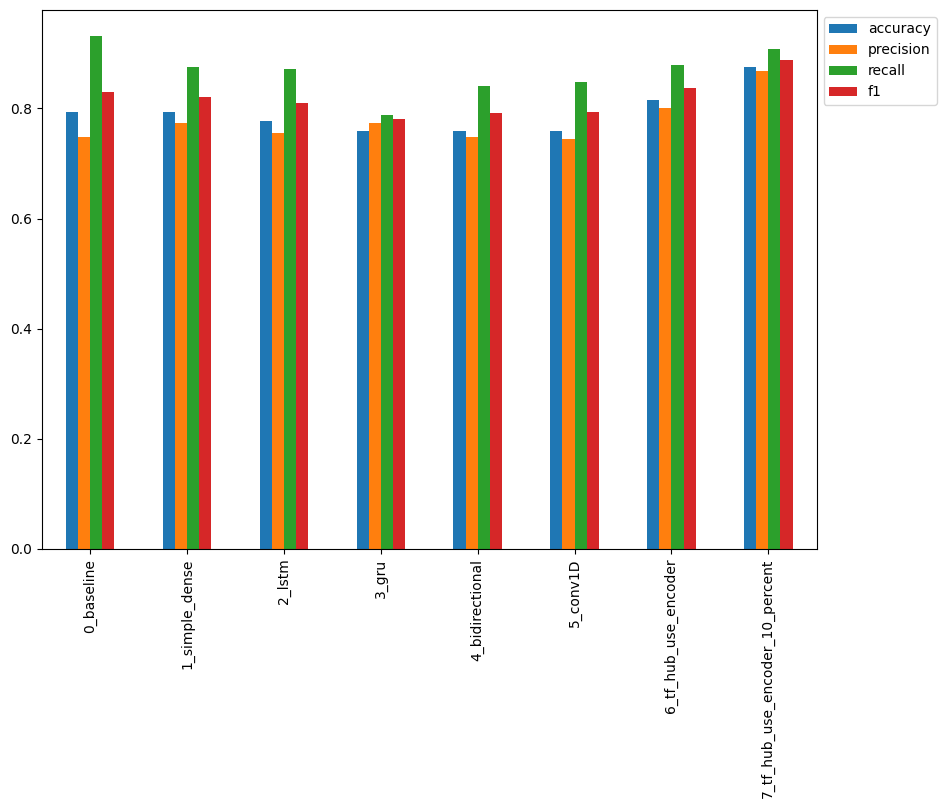

In [219]:
all_model_results.plot(kind="bar", figsize=(10,7)).legend(bbox_to_anchor=(1.0, 1.0))

<Axes: >

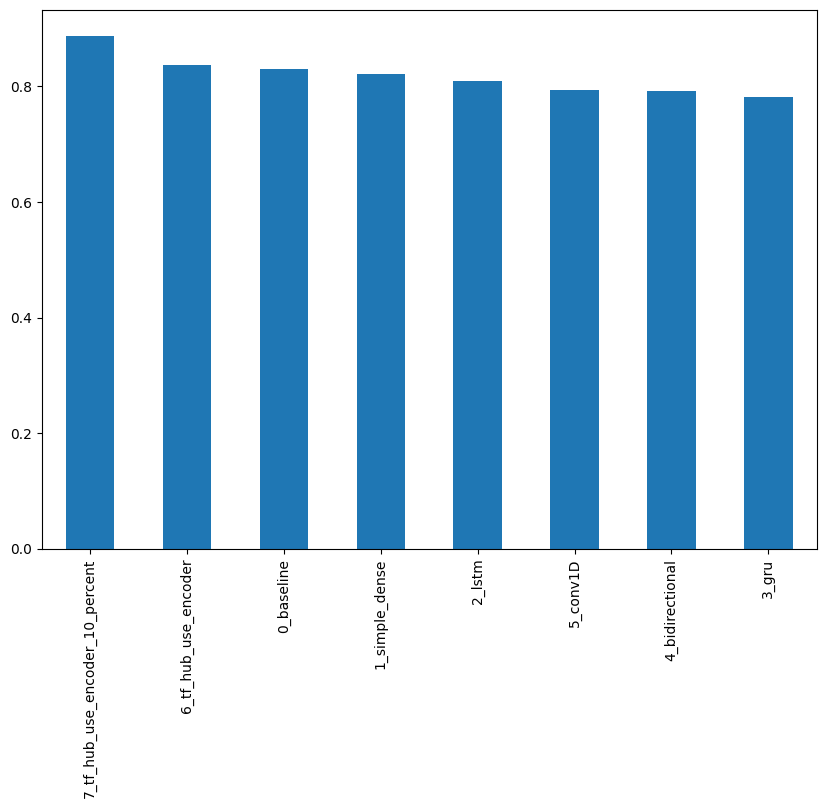

In [221]:
# sort model results by F1 score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10,7))